In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2
from matplotlib import pyplot
from matplotlib.pyplot import MultipleLocator
from pylab import *
from tensorflow.keras.models import Model
from tensorflow.keras import models

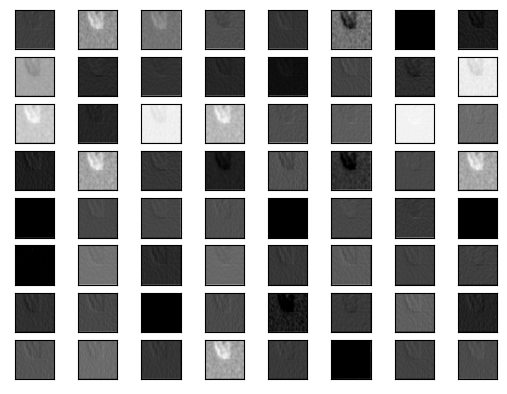

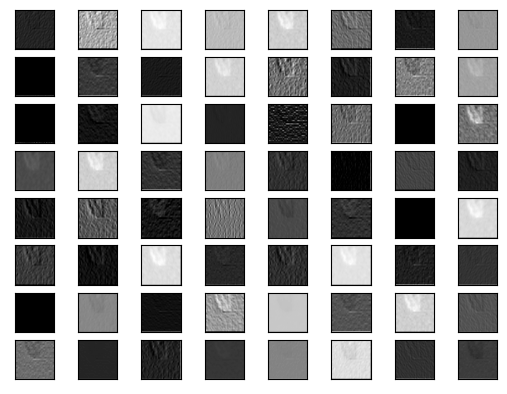

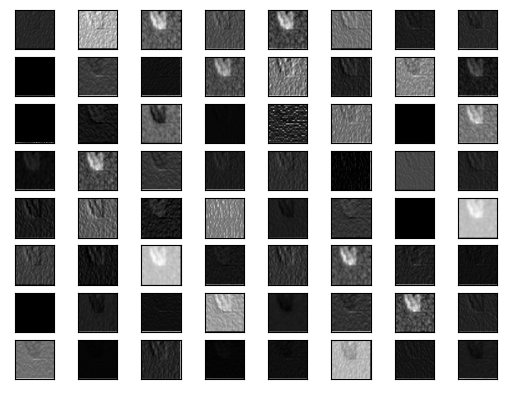

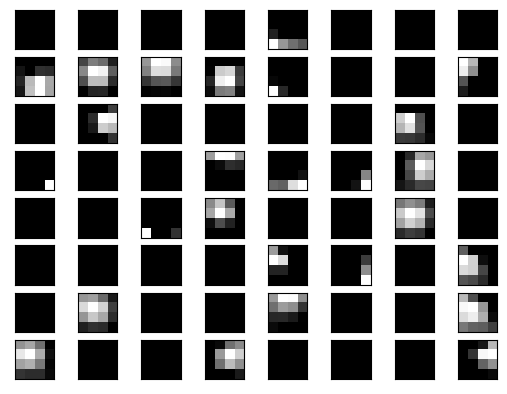

In [19]:
model_path = r'C:\Users\ee527\Dementia_Vision_beta\model\test.h5'

# D:\Dementia_Data_Preprocessing\main\label_image\4\20210819_t050450.jpg
test_img = r"D:\Dementia_Data_Preprocessing\main\out_image\20210825_t021112.jpg"


image = cv2.imread(test_img)
INPUT_SIZE = 128
image = cv2.resize(image, (INPUT_SIZE,INPUT_SIZE))
image = image.astype('float32') / 255
image = np.expand_dims(image, axis=0)
model = tf.keras.models.load_model(model_path)
ixs = [1,2,3,21]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
feature_maps = model.predict(image)
# plot the output from each block
square = 8
for fmap in feature_maps:
    # plot all 64 maps in an 8x8 squares
    ix = 1
    for _ in range(square):
        for _ in range(square):
            # specify subplot and turn of axis
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
            
            ix += 1
    # show the figure
    pyplot.show()

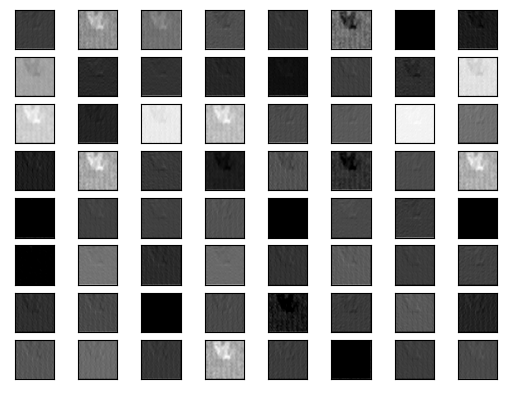

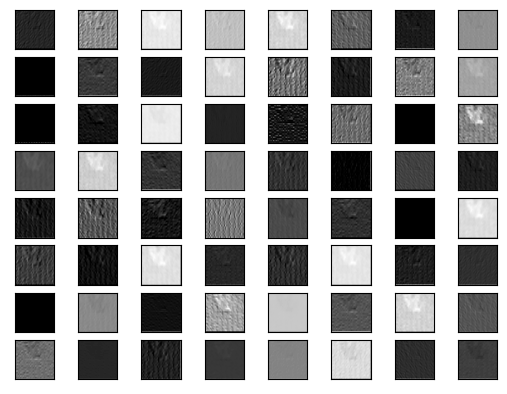

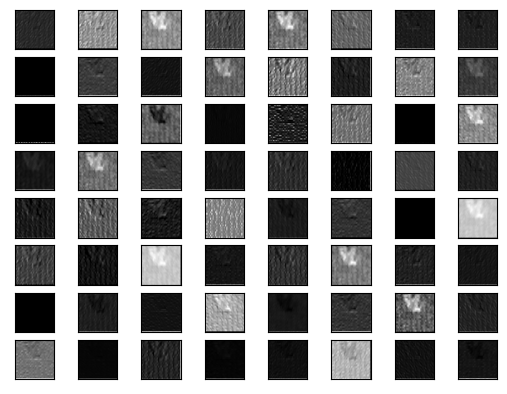

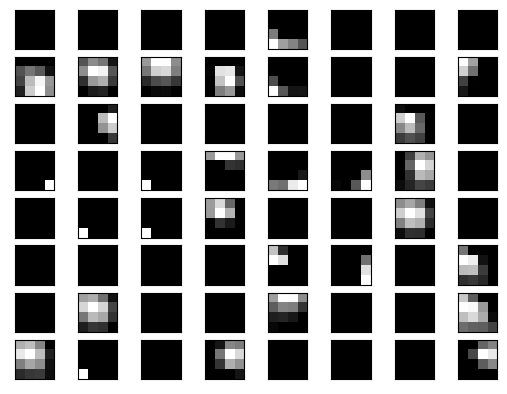

In [18]:
model_path = r'C:\Users\ee527\Dementia_Vision_beta\model\test.h5'

# D:\Dementia_Data_Preprocessing\main\label_image\4\20210819_t050450.jpg
test_img = r"D:\Dementia_Data_Preprocessing\main\out_image\20210825_t021110.jpg"


image = cv2.imread(test_img)
INPUT_SIZE = 128
image = cv2.resize(image, (INPUT_SIZE,INPUT_SIZE))
image = image.astype('float32') / 255
image = np.expand_dims(image, axis=0)
model = tf.keras.models.load_model(model_path)
ixs = [1,2,3,21]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
feature_maps = model.predict(image)
# plot the output from each block
square = 8
for fmap in feature_maps:
    # plot all 64 maps in an 8x8 squares
    ix = 1
    for _ in range(square):
        for _ in range(square):
            # specify subplot and turn of axis
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
            ix += 1
    # show the figure
    pyplot.show()

## start compare feature map ssim 

26
(1, 4, 4, 512)


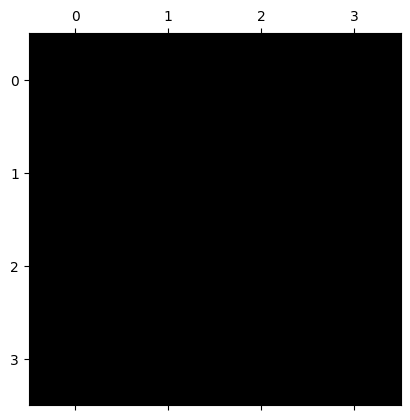

In [15]:
model_path = r'C:\Users\ee527\Dementia_Vision_beta\model\test.h5'

# D:\Dementia_Data_Preprocessing\main\label_image\4\20210819_t050450.jpg
test_img = r"D:\Dementia_Data_Preprocessing\main\out_image\20210825_t021110.jpg"


image = cv2.imread(test_img)
INPUT_SIZE = 128
image = cv2.resize(image, (INPUT_SIZE,INPUT_SIZE))
image = image.astype('float32') / 255
image = np.expand_dims(image, axis=0)
model = tf.keras.models.load_model(model_path)
#model.summary()
layer_outputs = [layer.output for layer in model.layers[1:]]
    
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)

activations = activation_model.predict(image)
print(len(activations))

layer = 20
channel = 5
 

layer_activation = activations[layer]
print(layer_activation.shape)
a = layer_activation[0, :, :, channel]
plt.matshow(layer_activation[0, :, :, channel], cmap = 'gray')
plt.show()


8
(1, 128, 128, 64)


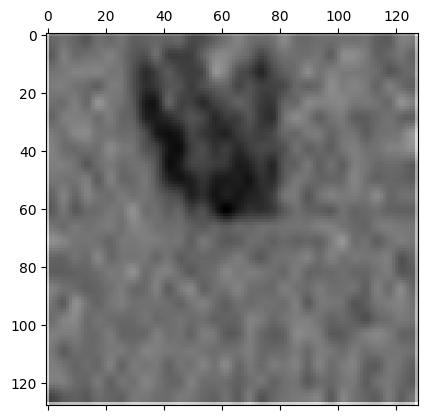

In [7]:
model_path = r'C:\Users\ee527\Dementia_Vision_beta\model\test.h5'

# D:\Dementia_Data_Preprocessing\main\label_image\4\20210819_t050450.jpg
test_img = r"D:\Dementia_Data_Preprocessing\main\out_image\20210825_t021112.jpg"


image = cv2.imread(test_img)
INPUT_SIZE = 128
image = cv2.resize(image, (INPUT_SIZE,INPUT_SIZE))
image = image.astype('float32') / 255
image = np.expand_dims(image, axis=0)
model = tf.keras.models.load_model(model_path)
#model.summary()
layer_outputs = [layer.output for layer in model.layers[:8]]
    
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)

activations = activation_model.predict(image)
print(len(activations))

 

layer_activation = activations[layer]
print(layer_activation.shape)
b = layer_activation[0, :, :, channel]
plt.matshow(layer_activation[0, :, :, channel], cmap = 'gray')
plt.show()

In [ ]:
from skimage.metrics import structural_similarity

(score, diff) = structural_similarity(a*255,b*255,full=True,multichannel=True)
print("SSIM: {}".format(score))

In [ ]:
from skimage.io import imsave, imread

a2 = (a*255)
a3 = a2.astype(np.uint8)

b2 = (b*255)
b3 = b2.astype(np.uint8)

imsave("D:\\Dementia_Data_Preprocessing\\test2\\test.jpg", a2)
imsave("D:\\Dementia_Data_Preprocessing\\test2\\test2.jpg", a3)
imsave("D:\\Dementia_Data_Preprocessing\\test2\\test3.jpg", b2)
imsave("D:\\Dementia_Data_Preprocessing\\test2\\test4.jpg", b3)

In [ ]:
print(a2)
print(a3)

In [ ]:
import cv2

c = cv2.imread(r"D:\\Dementia_Data_Preprocessing\\test\\test.jpg")
d = cv2.imread(r"D:\\Dementia_Data_Preprocessing\\test\\test2.jpg")
print(c)
print(d)
cc = cv2.imread(r"D:\\Dementia_Data_Preprocessing\\test\\test3.jpg")
dd = cv2.imread(r"D:\\Dementia_Data_Preprocessing\\test\\test4.jpg")

In [ ]:
c2 = cv2.imread(r"D:\\Dementia_Data_Preprocessing\\test2\\test.jpg")
d2 = cv2.imread(r"D:\\Dementia_Data_Preprocessing\\test2\\test2.jpg")
cc2 = cv2.imread(r"D:\\Dementia_Data_Preprocessing\\test2\\test3.jpg")
dd2 = cv2.imread(r"D:\\Dementia_Data_Preprocessing\\test2\\test4.jpg")

In [ ]:
cg = cv2.cvtColor(c2, cv2.COLOR_BGR2GRAY)
ret, th1 = cv2.threshold(cg, 60, 255, cv2.THRESH_BINARY)
cv2.imshow('Result', th1)
cv2.waitKey(0)

In [ ]:
ccg = cv2.cvtColor(cc2, cv2.COLOR_BGR2GRAY)
ret, th2 = cv2.threshold(ccg, 60, 255, cv2.THRESH_BINARY)
cv2.imshow('Result', th2)
cv2.waitKey(0)

In [ ]:
(score, diff) = structural_similarity(th1, th2, full=True, multichannel = True)
print("SSIM: {}".format(score))